In [1]:
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from lbc.experiments.runner import SCENARIO_DEFAULT
from lbc.analysis import run_analysis

%matplotlib inline
%load_ext autoreload

In [2]:
%autoreload 2
from lbc.experiments import (
    DPCRunner, MPCOneShotRunner, MPCRunner, RLCRunner, CPLRunner)

In [3]:
%autoreload
from configs import make_configs

In [4]:
dr = "PC"
configs = make_configs(dr, batch_size=5, lookahead=4)

# MPCOneShot

INFO:/Users/dbiagion/gitrepos/learning-building-control/lbc/policies/mpc.py:one-shot: batch sample (1/5)
INFO:/Users/dbiagion/gitrepos/learning-building-control/lbc/policies/mpc.py:one-shot: batch sample (2/5)
INFO:/Users/dbiagion/gitrepos/learning-building-control/lbc/policies/mpc.py:one-shot: batch sample (3/5)
INFO:/Users/dbiagion/gitrepos/learning-building-control/lbc/policies/mpc.py:one-shot: batch sample (4/5)
INFO:/Users/dbiagion/gitrepos/learning-building-control/lbc/policies/mpc.py:one-shot: batch sample (5/5)
INFO:lbc.experiments.runner:[MPCOneShot-PC-test] bsz=5, loss=12.157, time=146.3
INFO:lbc.experiments.runner:saved to ./_scratch/MPCOneShot-PC-test.p


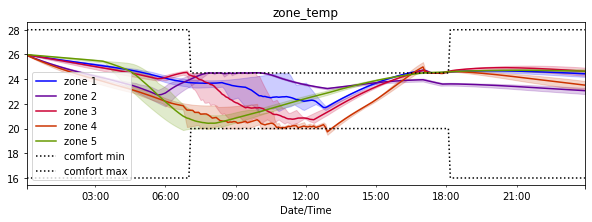

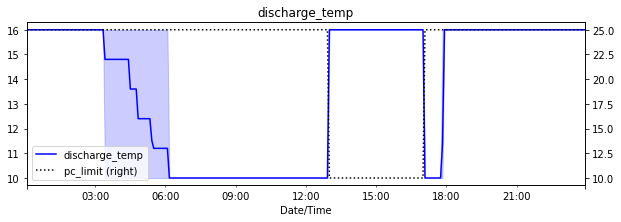

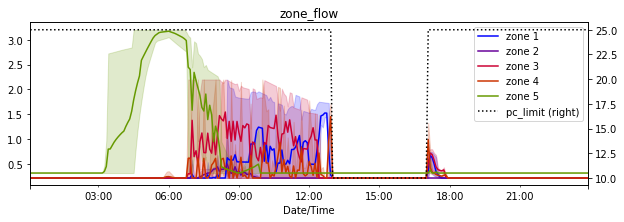

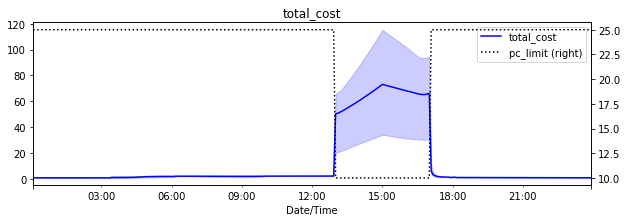

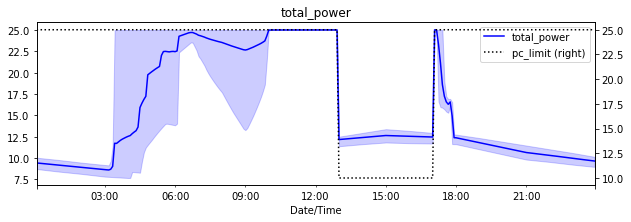

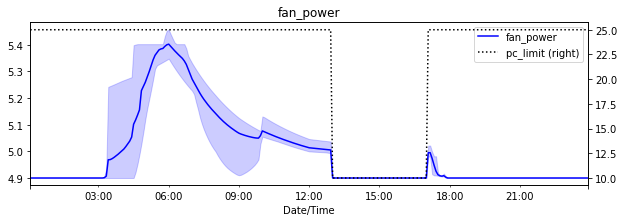

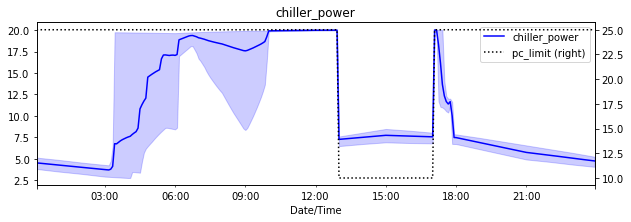

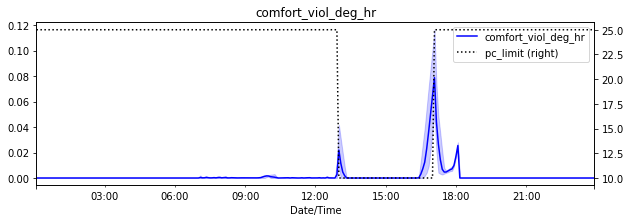

In [5]:
config = configs["MPCOneShot"]

runner0 = MPCOneShotRunner(**config)
loss0, rollout0, meta0 = runner0.run()

_, df, figs = run_analysis(rollout0, dr, secondary=True)

In [6]:
# _ = pd.DataFrame(rollout1.data["predicted_energy_price"]).plot()
# _ = pd.DataFrame(rollout1.data["energy_price"]).plot()

# MPC

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 287/287 [02:52<00:00,  1.66it/s]
INFO:lbc.experiments.runner:[MPC-PC-test] bsz=5, loss=15.448, time=173.0
INFO:lbc.experiments.runner:saved to ./_scratch/MPC-PC-test.p


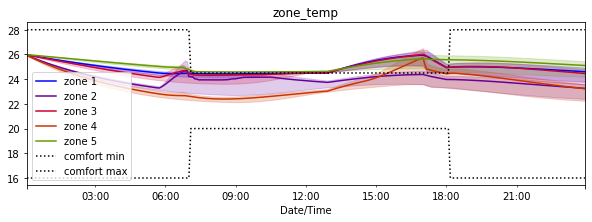

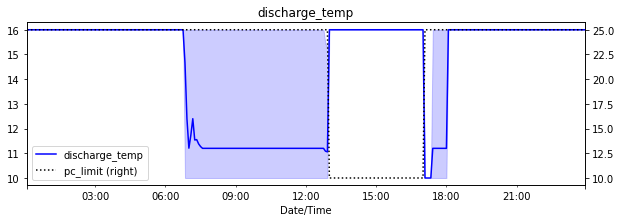

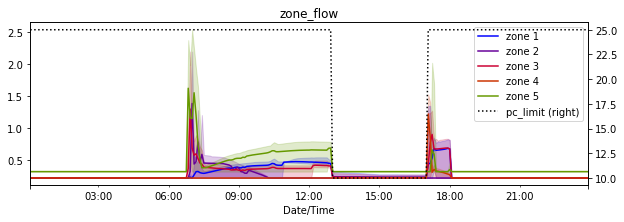

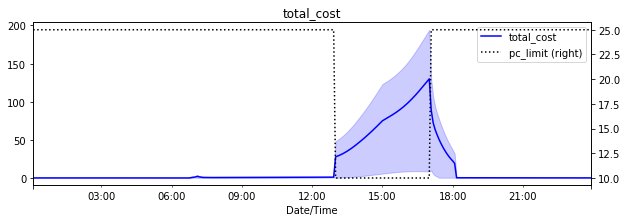

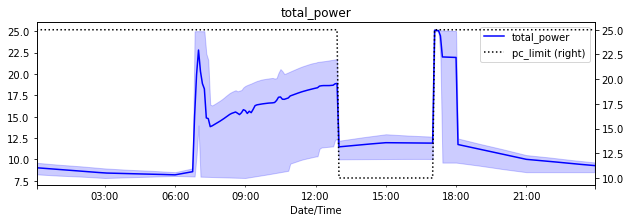

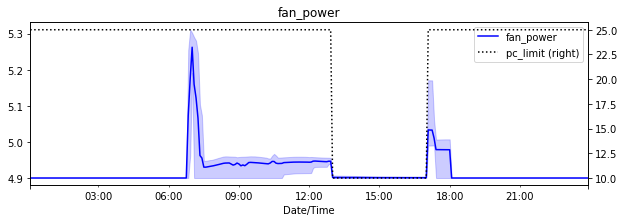

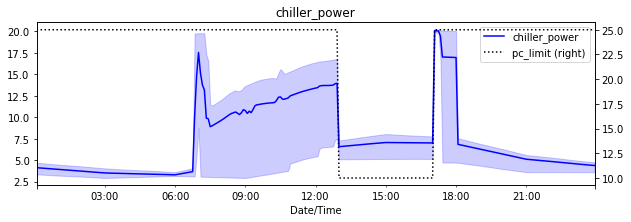

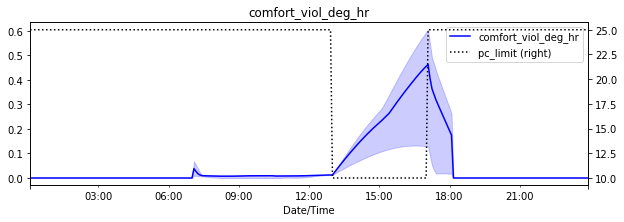

In [7]:
config = configs["MPC"]

runner1 = MPCRunner(**config)
loss1, rollout1, meta1 = runner1.run()

_, df, figs = run_analysis(rollout1, dr, secondary=True)

# CPL - No learning

In [8]:
config = configs["CPL"]
config

{'name': 'CPL-PC-test',
 'policy_type': 'CPL',
 'batch_size': 5,
 'dr_program': 'PC',
 'scenario_config': {'start_time': '00:05:00',
  'end_time': '23:55:00',
  'zone_temp_init_mean': 26.0,
  'dr_program': <lbc.demand_response.DemandResponseProgram at 0x7f8919766c70>},
 'policy_config': {'lookahead': 4,
  'lr': 10,
  'num_epochs': 50,
  'use_value_function': 0,
  'num_time_windows': 24},
 'training': True,
 'dry_run': 0,
 'results_dir': './_scratch'}

/Users/dbiagion/miniconda3/envs/lbc/lib/python3.8/site-packages/cvxpy/expressions/expression.py:558: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)
  0%|                                                                                                            | 0/1 [00:00<?, ?it/s]INFO:lbc.experiments.run_cpl:With use_value_function=False we only run one epoch against the test set. Training loss will be nan here (expected).
/Users/dbiagion/miniconda3/envs/lbc/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:129: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you 

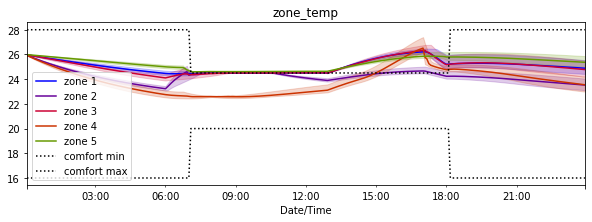

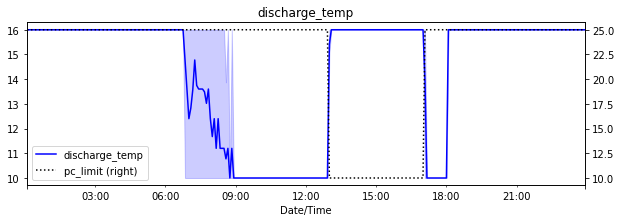

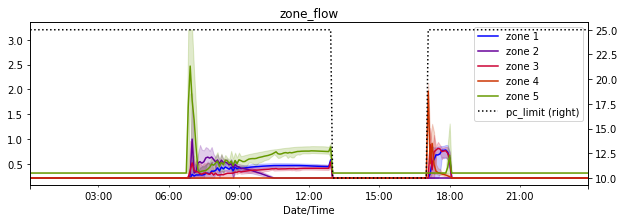

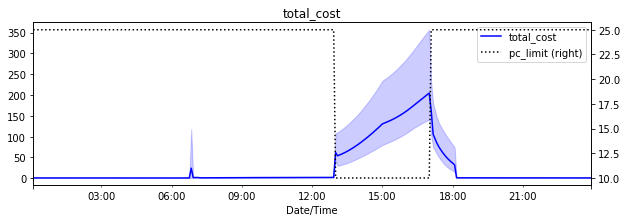

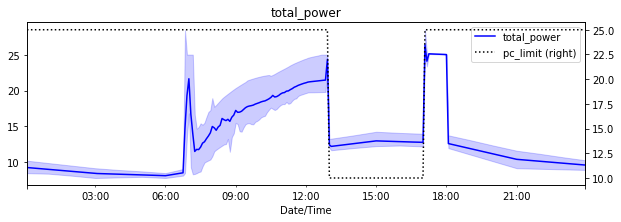

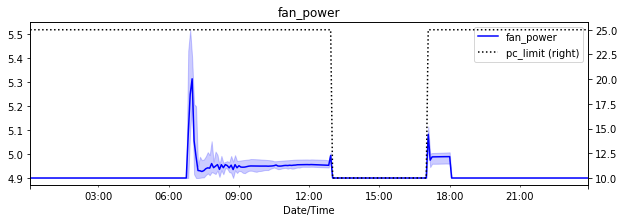

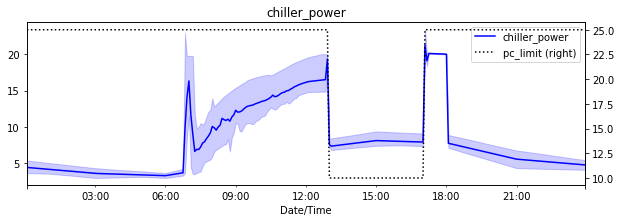

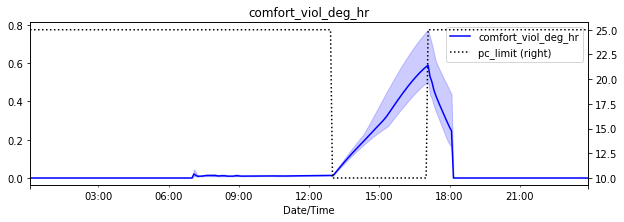

In [9]:
runner2 = CPLRunner(**config)
loss2, rollout2, meta2 = runner2.run()

_, df, figs = run_analysis(rollout2, dr, secondary=True)

# CPL - Learning

In [10]:
config = configs["CPL"]
config["policy_config"]["use_value_function"] = 1
config["policy_config"]["num_epochs"] = 10  # increase this if truly trying to train
config

{'name': 'CPL-PC-test',
 'policy_type': 'CPL',
 'batch_size': 5,
 'dr_program': 'PC',
 'scenario_config': {'start_time': '00:05:00',
  'end_time': '23:55:00',
  'zone_temp_init_mean': 26.0,
  'dr_program': <lbc.demand_response.DemandResponseProgram at 0x7f89421aa160>},
 'policy_config': {'lookahead': 4,
  'lr': 10,
  'num_epochs': 10,
  'use_value_function': 1,
  'num_time_windows': 24},
 'training': True,
 'dry_run': 0,
 'results_dir': './_scratch'}

/Users/dbiagion/miniconda3/envs/lbc/lib/python3.8/site-packages/cvxpy/expressions/expression.py:558: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 2 times so far.

  warnings.warn(msg, UserWarning)
7.916, 15.521 1.000e+01: 100%|█████████████████████████████████████████████████████████████████████████| 10/10 [05:42<00:00, 34.20s/it]
INFO:lbc.experiments.runner:[CPL-PC-test] bsz=5, loss=5.908, time=344.2
INFO:lbc.experiments.runner:saved to ./_scratch/CPL-PC-test.p


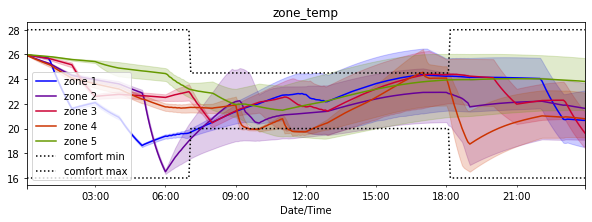

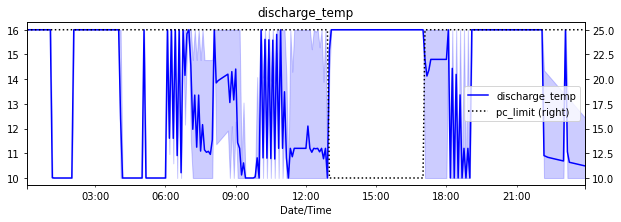

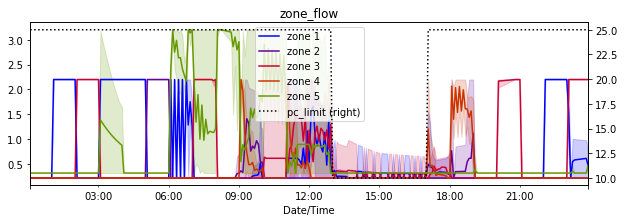

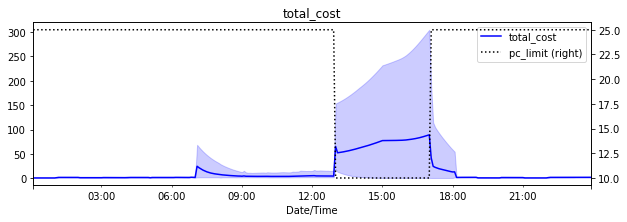

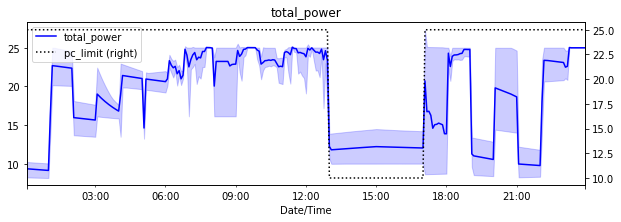

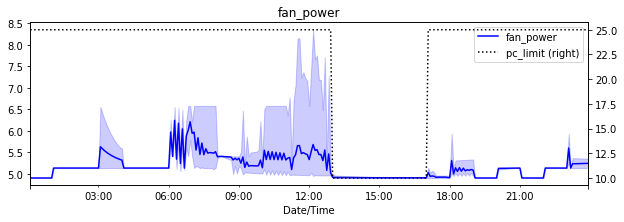

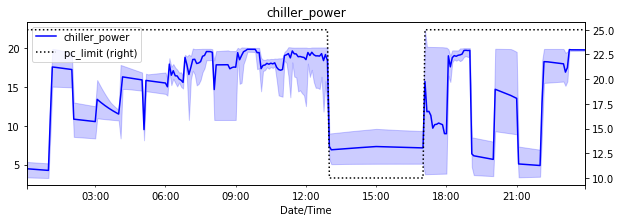

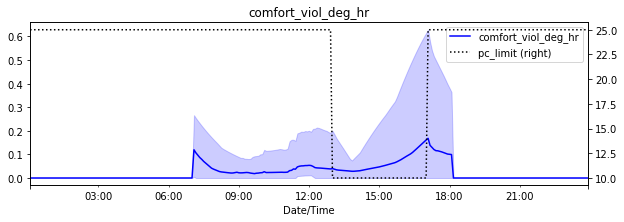

In [11]:
runner3 = CPLRunner(**config)
loss3, rollout3, meta3 = runner3.run()

_, df, figs = run_analysis(rollout3, dr, secondary=True)

# DPC

In [12]:
configs["DPC"]

{'name': 'DPC-PC-test',
 'policy_type': 'DPC',
 'batch_size': 5,
 'dr_program': 'PC',
 'scenario_config': {'start_time': '00:05:00',
  'end_time': '23:55:00',
  'zone_temp_init_mean': 26.0,
  'dr_program': <lbc.demand_response.DemandResponseProgram at 0x7f8913ae5c10>},
 'policy_config': {'model_config': {'hidden_dim': 128, 'num_time_windows': 24},
  'lr': 0.01,
  'num_epochs': 1000},
 'training': True,
 'dry_run': 0,
 'results_dir': './_scratch'}

5.774, 5.806,: 100%|█████████████████████████████████████████████████████████████████████████████████| 500/500 [09:18<00:00,  1.12s/it]
INFO:lbc.experiments.runner:[DPC-PC-test] bsz=5, loss=5.140, time=558.5
INFO:lbc.experiments.runner:saved to ./_scratch/DPC-PC-test.p


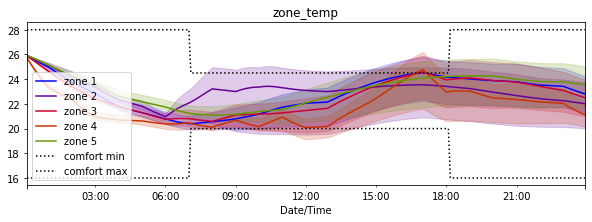

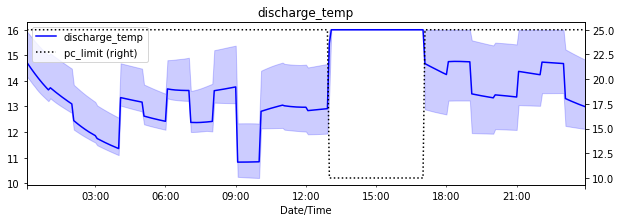

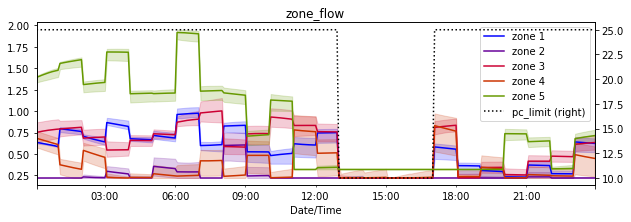

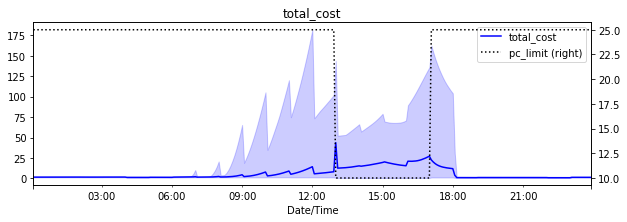

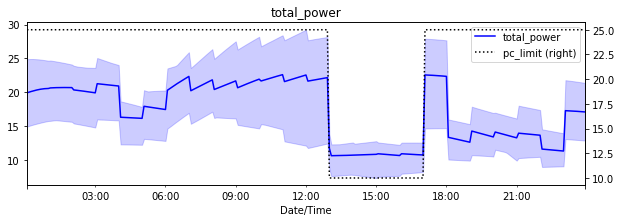

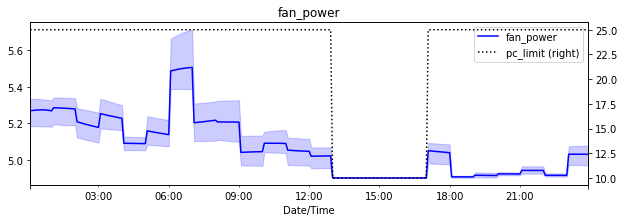

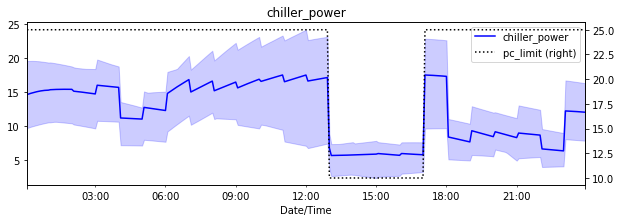

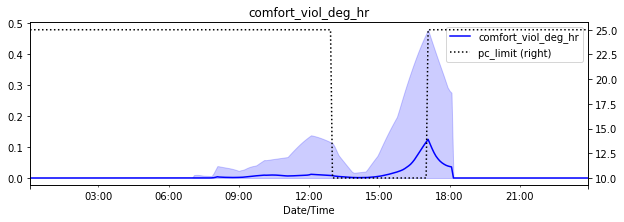

In [13]:
config = configs["DPC"]
config["policy_config"]["num_epochs"] = 500
config["policy_config"]["lr"] = 1e-3

runner4 = DPCRunner(**config)
loss4, rollout4, meta4 = runner4.run()

_, df, figs = run_analysis(rollout4, dr, secondary=True)

# RLC

2022-02-09 23:13:18,866	INFO trainer.py:722 -- Your framework setting is 'tf', meaning you are using static-graph mode. Set framework='tf2' to enable eager execution with tf2.x. You may also want to then set `eager_tracing=True` in order to reach similar execution speed as with static-graph mode.
2022-02-09 23:13:18,867	INFO ppo.py:166 -- In multi-agent mode, policies will be optimized sequentially by the multi-GPU optimizer. Consider setting simple_optimizer=True if this doesn't work for you.
2022-02-09 23:13:18,868	INFO trainer.py:743 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
(RolloutWorker pid=28807) /Users/dbiagion/miniconda3/envs/lbc/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
(RolloutWorker pid=28807)   logger.warn(
(RolloutWorker pid=28807) 2022-02-09 23:13:24,926	WARNING deprecation.py:45 -- DeprecationWarning: `SampleBatch['is_trai

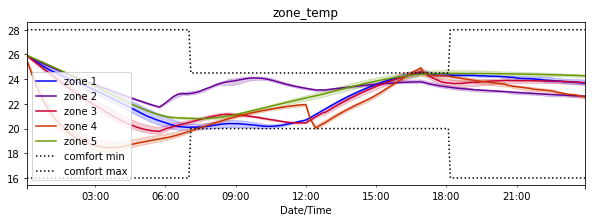

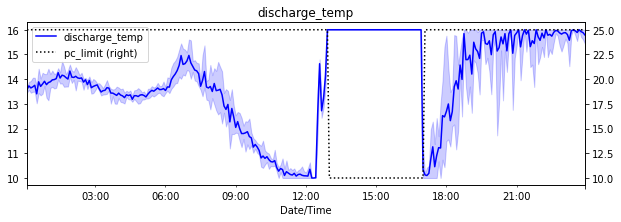

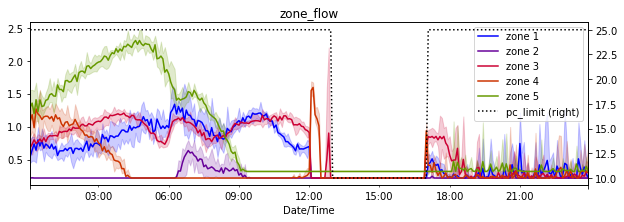

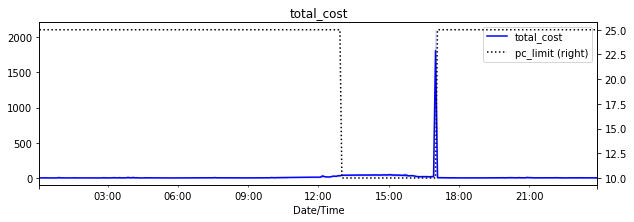

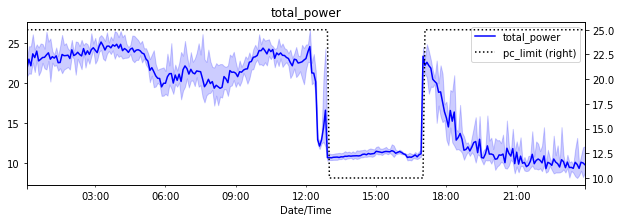

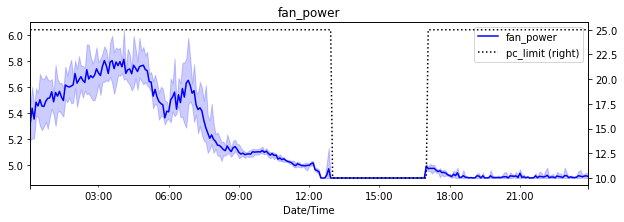

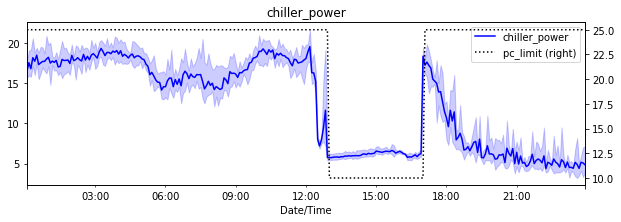

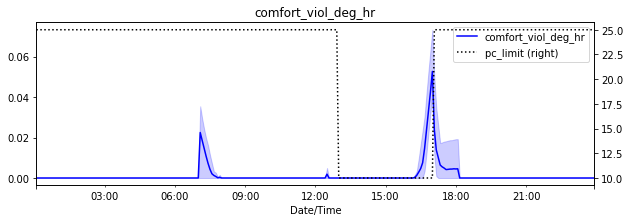

In [14]:
config = configs["RLC"]

# Shut down ray in case it's still running, fail silently
try:
    import ray
    ray.shutdown()
except:
    pass

runner5 = RLCRunner(**config)
loss5, rollout5, meta5 = runner5.run()

_, df, figs = run_analysis(rollout5, dr, secondary=True)